In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
import mcmc_aux

reading the mock SAGA survey - in princple we can also create one on the fly from the merger trees

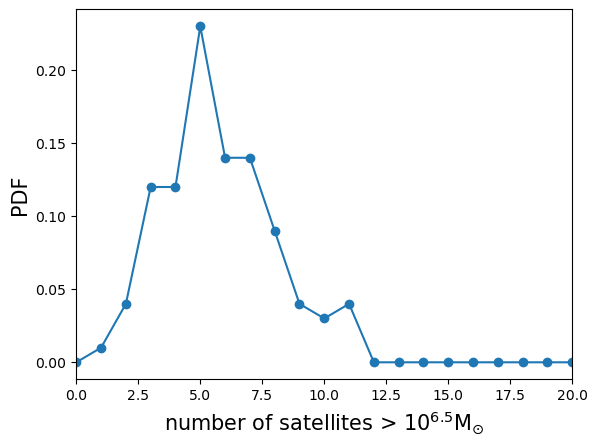

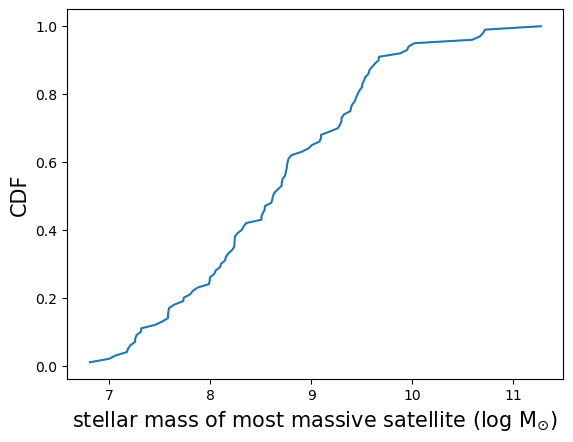

In [3]:
data = mcmc_aux.test_data([1.9,-0.2,0.6,10])
data.get_stats(min_mass=6.5)

# select = np.random.randint(0,101)
# data = mcmc_aux.mock_SAGA_survey([1.9,-0.2,0.6,0.3], SAGA_ind=select, file="../../data/MCMC/SAGA_samples_10k.npy")
# data.get_stats(min_mass=6.5)

now working with the models

In [4]:
def forward(theta):
    models = mcmc_aux.satgen_models(theta, data.lgMh)
    models.get_stats(min_mass=6.5)
    return models.stat.Pnsat, models.stat.Msmax

now the log likelyhoods

In [5]:
def lnlike(theta):
    model_Pnsat, models_Msmax = forward(theta)
    lnL_sat = mcmc_aux.lnL_Pnsat(model_Pnsat, data.stat.satfreq)
    lnL_max = mcmc_aux.lnL_KS(models_Msmax, data.stat.Msmax)
    return lnL_sat + lnL_max

def lnprior(theta):
    alpha, delta, sigma, gamma = theta
    if -5 < alpha < 5 and -3 < delta < 1 and 0 < sigma < 5:
        lp = 0
    else:
        lp = -np.inf
    chi2_pr = ((gamma - 10.0) / 0.2) ** 2
    lnLPR = -chi2_pr / 2.0
    return lnLPR + lp

def lnprob(theta):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    else:
        return lp + lnlike(theta)

intializing the run!

In [6]:
start_theta = [1.2, -0.3, 1, 9] # a somewhat random starting place
params = ["a_1", "a_2", "a_3", "a_4"]
priors = [(-5, 5), (-3, 1), (0, 5), (8, 12)]
nwalk = 500
nsteps = 500
ndim = 4

RUNNING!

In [7]:
mcmc_out = mcmc_aux.RUN(start_theta, lnprob, nwalkers=nwalk, niter=nsteps, ndim=ndim)

Run took 3201.1 seconds


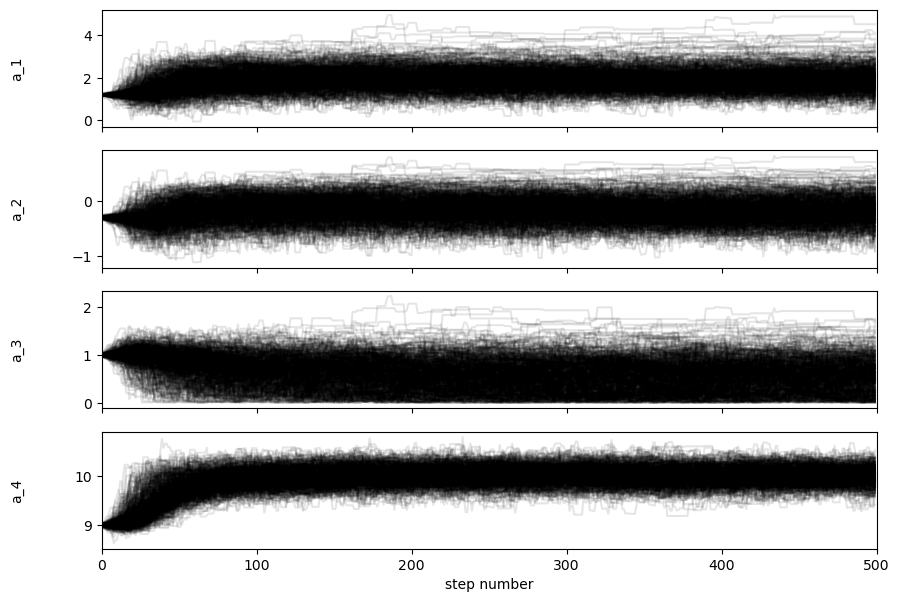

In [26]:
run = mcmc_aux.inspect_run(mcmc_out, fid_theta=data.fid_theta, labels=params, priors=priors)
run.chain_plot()

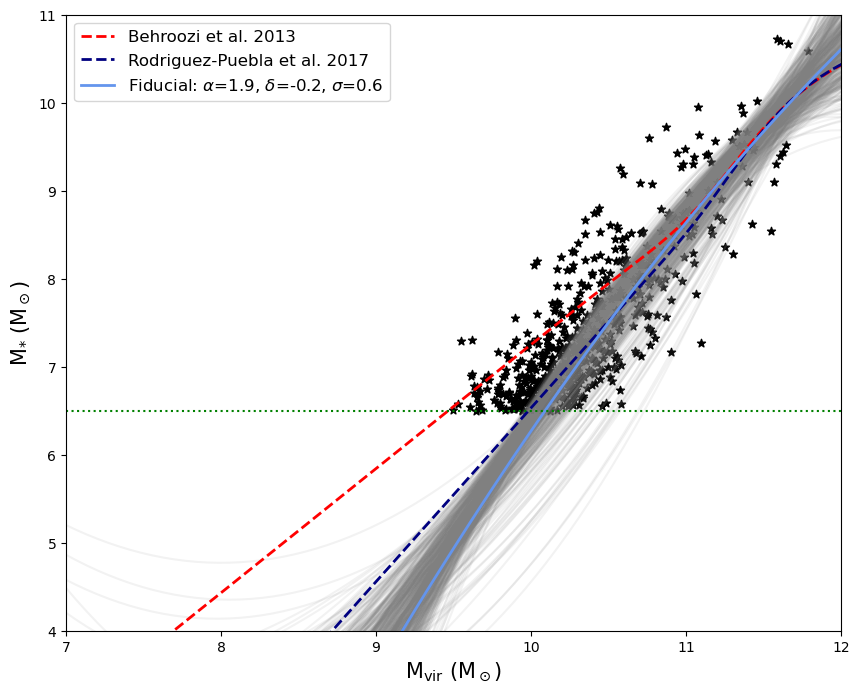

In [27]:
run.SHMR_plot(data)

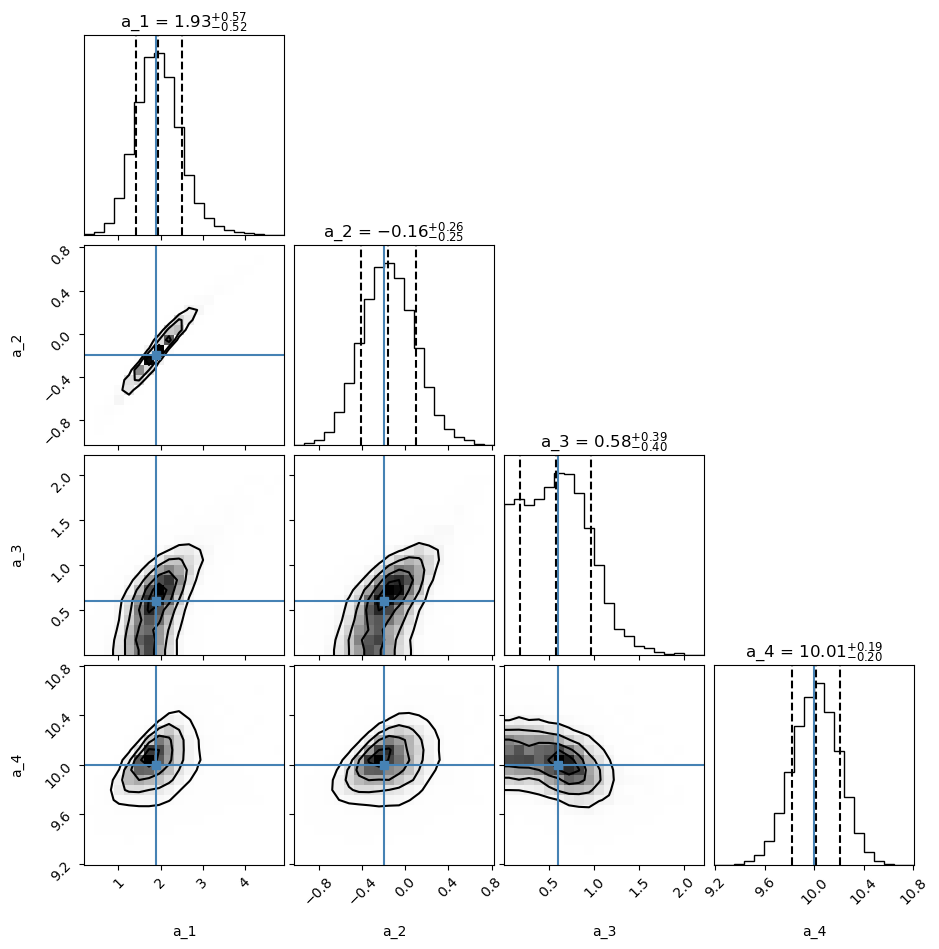

In [28]:
run.corner_plot(burn=400)

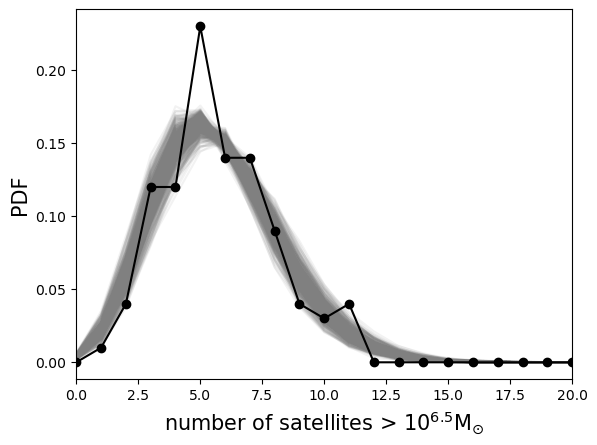

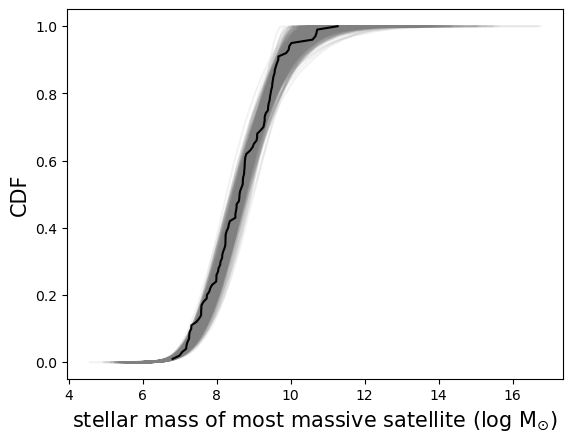

In [29]:
run.stat_plot(data)